# Stock Market Analysis
##### Shubham Mittal - CMSC320 Final Project Tutorial

### 1. Introduction
Interest in the stock market has been increasing especially after the introduction of more user friendly trading apps such as Robinhood. Financial data has also started becoming more accessible in part fueling this increase. The pandemic shook the global economy and the market experienced a lot of volatility. As a result, at the beginning of the pandemic, people started [moving away](https://www.statista.com/topics/7856/covid-19-and-investment-behavior-worldwide/#dossierKeyfigures) from the stock market to more low risk investments. However, as the pandemic has continued, a [new surge of people](https://www.cnbc.com/2021/04/08/a-large-chunk-of-the-retail-investing-crowd-got-their-start-during-the-pandemic-schwab-survey-shows.html) have started coming back to the stock market. 

Data analysis of the stock market can help traders and investors make decisions about buying and selling securities and gain an edge in the market. In this tutorial, I will analyze stock market data in different intervals to identify intraday, monthly, and yearly trends. Then we will use machine learning to also verify and predict trends. These trends could help identify periods of time that may be more lucrative for trading (a certain time of day or a certain month of a year) allowing investors to make better trading decisions. This tutorial will also help you gain a better understanding of the data science pipeline and hopefully allow you to analyze stock market data for your own purposes. 

The data science pipeline in this tutorial will consist of the following steps:
- Data Collection
- Data Cleaning & Processing
- Visualization
- Analysis & Hypothesis Testing
- Conclusions & Insights

### 2. Required Tools
In order to understand this tutorial and follow along, you will need to have a basic understanding of Python. [Click here](https://developers.google.com/edu/python/?hl=en) for a quick refresher of python. We will be using Python 3.8 in this tutorial and the following libraries: 
- [Pandas](https://pandas.pydata.org/docs/getting_started/install.html)
- [NumPy](https://numpy.org/install/)
- [yfinance](https://pypi.org/project/yfinance/) 
- [datetime](https://pypi.org/project/DateTime/)
- [pandassql](https://pypi.org/project/pandasql/)
- [pandas_ta](https://pypi.org/project/pandas-ta/)
- [seaborn](https://pypi.org/project/seaborn/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [fastai](https://pypi.org/project/fastai/)
- [sklearn](https://pypi.org/project/sklearn/)
- [keras](https://pypi.org/project/keras/)

Pandas and NumPy will be useful to manipulate and store our data. We will be getting financial data from Yahoo Finance using the yfinance library. There are also other services to obtain stock data such as the [Bloomberg Finance API](https://www.bloomberg.com/professional/product/server-api/?bbgsum-page=DG-WS-PROF-BLOG-POST-126213&tactic-page=529917) and [Quandl](https://demo.quandl.com/) and you may choose to use any of them if you prefer. 

All of the above libraries can be installed using pip (which is recommended) but the links provide more detailed information on downloading for specific OS's. Succesful execution of the cell below should import all the necessary libraries required for the rest of this tutorial. 

In [1]:
# Importing dependencies for purposes as defined above
import datetime
import pandas as pd
import numpy as np
import yfinance as yfin
import pandasql as psql
import pandas_ta as ta
import seaborn as sns
import plotly.graph_objects as plotly
import matplotlib.pyplot as plt
from fastai.tabular.core import add_datepart
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

### 3. Data Collection

The first step of the data science pipeline is to obtain the data, in this case using the yfinance library. For the purposes of this tutorial, we will be analyzing two tickers, Google (GOOGL) and the S&P 500 index (^GSPC). Google is a major technological company and the S&P 500 or the Standard and Poor's 500 is an index tracking the performance of the 500 large companies listed on stock exchanges in the United States (Google being on of them).

We will be collecting data for the above two tickers in three intervals, hourly, daily, and monthly to analyze trends across different time periods. We will be collecting data from To get started, we can simply use the yfinance library's download function to obtain the necessary data. The function can take multiple parameters which can help us specify how we want the data presented. Some of the main ones are: 
- tickers (list or string): list for multiple tickers and string for a singular ticker
- start (string): start date in the format YYYY-MM-DD
- end (string): end date in the format YYYY-MM-DD
- period (string): can be used instead of start and end to get a period of the most recent data (Example: 1y)
- interval (string): specify the interval data is provided in. Valid intervals: 1m (1 minute), 1h (1 hour), 1d (1 day), 1mo (1 month)
- progress (boolean): True means a progress bar of obtaining data will be shown and False means it will not
- auto_adjust (boolean): True means data will adjust all OHLC automatically and account for things like stock split while False will not

To learn more about the options the yfinance library provides us with, [click here](https://pypi.org/project/yfinance/)

In [2]:
# Obtaining hourly, daily, and monthly data for GOOGL for the past year
hourly_GOOGL = yfin.download("GOOGL", period="365d", interval="1h", progress=False, auto_adjust=True)
daily_GOOGL = yfin.download("GOOGL", period="5y", interval="1d", progress=False, auto_adjust=True)
monthly_GOOGL = yfin.download("GOOGL", period="5y", interval="1mo", progress=False, auto_adjust=True)

# Obtaining hourly, daily, and monthly data for S&P 500 for the past year
hourly_GSPC = yfin.download("^GSPC", period="365d", interval="1h", progress=False, auto_adjust=True)
daily_GSPC = yfin.download("^GSPC", period="5y", interval="1d", progress=False, auto_adjust=True)
monthly_GSPC = yfin.download("^GSPC", period="5y", interval="1mo", progress=False, auto_adjust=True)

We have now obtained hourly data for the past year along with daily and monthly data for the past 5 years. This should be enough information for us to conduct our analysis and identify trends. Make sure to pay special attention to the values you input for parameters to ensure you are receiving data as expected.

Next, let's take a look at what the data we have collected looks like. 

In [3]:
hourly_GOOGL.head(5)

,Open,High,Low,Close,Volume
2020-12-02 09:30:00-05:00,1795.359985,1804.961792,1785.169556,1802.721069,266946
2020-12-02 10:30:00-05:00,1800.814941,1816.790039,1800.814941,1815.469971,170913
2020-12-02 11:30:00-05:00,1816.630005,1831.560059,1813.569946,1824.489868,222899
2020-12-02 12:30:00-05:00,1823.819946,1832.069946,1818.900024,1827.954956,203982
2020-12-02 13:30:00-05:00,1828.000000,1831.630005,1823.494995,1831.630005,81923


In [4]:
daily_GOOGL.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-15,955.289978,962.700012,952.820007,959.219971,1337700
2017-05-16,963.549988,965.900024,960.349976,964.609985,1101500
2017-05-17,959.700012,960.989990,940.059998,942.169983,2449100
2017-05-18,943.200012,954.179993,941.270020,950.500000,1800500
2017-05-19,952.820007,959.559998,952.000000,954.650024,1360300


In [5]:
monthly_GOOGL.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-01,990.960022,1008.609985,929.599976,929.679993,44085300
2017-07-01,933.219971,1006.190002,915.309998,945.500000,41908600
2017-08-01,947.809998,957.200012,918.599976,955.239990,32846200
2017-09-01,957.469971,975.809998,924.510010,973.719971,29626200
2017-10-01,975.650024,1063.619995,961.950012,1033.040039,36853800


From the above dataframes we can note a couple of things. All of our dataframes are indexed using the date or date and time (for the hourly dataframes). We can also notice in the daily_GOOGL dataframe, the data for 2017-05-13 and 2017-05-14 is missing. Missing values in the data obtained could be due to a number of reasons including holidays, the market closed early, or data is simply missing and was not recorded.

By looking at the data, we are able to identify different aspects that we will need to modify and process for easier analysis in further steps. All of this occurs in the second step of the data science pipeline, data cleaning and processing.

### 4. Data Cleaning & Processing
As identified above, there are a couple of steps we need to take before we will be able to analyze our data for trends. First, we will get rid of any null or missing values in our data as they will not be useful in analysis. Second, we will remove indexing by date and rename all columns for standardization of data. Third, we will label our dataframes with the hour of the day, day of the week, and month of the year for the hourly, daily, and monthly dataframes respectively. 

Once we have processed and cleaned our dataframes for easier readability and analysis, we will modify them with other features such as percent change since open to give us a better sense of how the stock prices change over time. We will also compute averages for all of the data points as with so many raw data points, visualization will not provide us with actionable information and seeing trends will be much harder. 

In [6]:
# Removing null values from our dataframes 
hourly_GOOGL = hourly_GOOGL.dropna()
daily_GOOGL = daily_GOOGL.dropna()
monthly_GOOGL = monthly_GOOGL.dropna()

hourly_GSPC = hourly_GSPC.dropna()
daily_GSPC = daily_GSPC.dropna()
monthly_GSPC = monthly_GSPC.dropna()

Next, we will resent indices and relabel the columns

In [7]:
# Resetting index to remove indexing by date
hourly_GOOGL = hourly_GOOGL.reset_index()
daily_GOOGL = daily_GOOGL.reset_index()
monthly_GOOGL = monthly_GOOGL.reset_index()

hourly_GSPC = hourly_GSPC.reset_index()
daily_GSPC = daily_GSPC.reset_index()
monthly_GSPC = monthly_GSPC.reset_index()

# Renaming Columns for standardization across dataframes
hourly_GOOGL.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
daily_GOOGL.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
monthly_GOOGL.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

hourly_GSPC.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
daily_GSPC.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
monthly_GSPC.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

Now we will define three functions that will help us label our dataframes by the hour, weekday, and month

In [8]:
# function that will label a dataframe by hour
def label_by_hour(df):
  # Will hold the labels for hours, should have values from 0 (for 9:30 am), 1 (10:30am), ..., to 6 (3:30 pm)
  hours = []
  # First hour already put into array 
  hour = 0
  hours.append(hour)
  # Start iterating from the first row of the dataframe
  for i in range(1, len(df)):
    # If we are in the same day, increment hour, otherwise rest hour
    if (df.loc[i]['Date'].weekday() == df.loc[i-1]['Date'].weekday()):
      hour += 1
      hours.append(hour)
    else:
      hour = 0
      hours.append(hour)  
      
  # Appending the hour label array to the dataframe and returning a new dataframe
  df.insert(1, "Hour", hours)
  return df

In [9]:
# function that will label a dataframe by weekday
def label_by_weekday(df):
  # Will hold the labels for days, should have values from 0 (Monday), 1 (Tuesday), ..., 4 (Friday)
  # Note, the stock market is not open on weekends
  days = []
  # Iterate through the dataframe to get the weekdays and append to the days label array
  for i in range(0, len(df)):
    days.append(df.loc[i]["Date"].weekday())
      
  # Appending the days label array to the dataframe and returning a new dataframe
  df.insert(1, "Weekday", days)
  return df
  

In [10]:
# function that will label a dataframe by month
def label_by_month(df):
  # Will hold the labels for months, should have values from 0 (January), 1 (February), ..., 12 (December)
  months = []
  # Iterate through the dataframe to get the months and append to the months label array
  for i in range(0, len(df)):
    months.append(df.loc[i]["Date"].month)
      
  # Appending the month label array to the dataframe and returning a new dataframe
  df.insert(1, "Month", months)
  return df
  

Now that we have defined functions for labelling our dataframes, we can go ahead and use them to label our stock data. After doing so, we should also verify that there were no errors while labelling our data. 

In [11]:
hourly_GOOGL = label_by_hour(hourly_GOOGL)
hourly_GSPC = label_by_hour(hourly_GSPC)

Next, let's verify that labelling by hour was appropriately done

In [12]:
print(hourly_GOOGL["Hour"].unique())
print(hourly_GSPC["Hour"].unique())

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


Here, for both dataframes we notice a value of 7 which should not be present as the stock market is only open for the 6 hours. To see why this may be happening, let's further examine our dataframes. 

In [13]:
hourly_GOOGL.tail(5)

,Date,Hour,Open,High,Low,Close,Volume
2545,2022-05-13 12:30:00-04:00,3,2349.590088,2353.669922,2332.810059,2339.919922,121483
2546,2022-05-13 13:30:00-04:00,4,2339.159912,2341.479980,2297.830078,2304.939941,166991
2547,2022-05-13 14:30:00-04:00,5,2306.629883,2334.660889,2302.560059,2333.909912,168066
2548,2022-05-13 15:30:00-04:00,6,2333.179932,2336.110107,2308.363281,2321.010010,231135
2549,2022-05-13 16:00:00-04:00,7,2321.010010,2321.010010,2321.010010,2321.010010,0


As we can see, the last row collected data for the end of the day at 4pm. We should also notice that the volume in that row is 0. This looks like an erroneous entry, so we will remove the row from our GOOGL dataframe before moving forward with processing our data. We will do the same for the GSPC dataframe. 

In [14]:
hourly_GOOGL = hourly_GOOGL.drop(hourly_GOOGL.index[-1])
hourly_GSPC = hourly_GSPC.drop(hourly_GSPC.index[-1])

Next, we will label our daily and monthly dataframes

In [15]:
daily_GOOGL = label_by_weekday(daily_GOOGL)
daily_GSPC = label_by_weekday(daily_GSPC)

Again, let's verify that our labelling was appropriately done. 

In [16]:
print(daily_GOOGL["Weekday"].unique())
print(daily_GSPC["Weekday"].unique())

[0 1 2 3 4]
[0 1 2 3 4]


In this case, looks like the labels were appropriately assigned. Lastly, we will label our monthly dataframes

In [17]:
monthly_GOOGL = label_by_month(monthly_GOOGL)
monthly_GSPC = label_by_month(monthly_GSPC)

Again, let's verify that the labelling was appropriately done. 

In [18]:
print(monthly_GOOGL["Month"].unique())
print(monthly_GSPC["Month"].unique())

[ 6  7  8  9 10 11 12  1  2  3  4  5]
[ 6  7  8  9 10 11 12  1  2  3  4  5]


Now that we have processed, cleaned, and labelled our dataframes, we can move forward with modifying them with other information that would be helpful in understanding the data such as percent change since open. 

In [19]:
# Calculating percent change since open for the hourly dataframes

# Arrays to hold pct_change, will be appended to dataframe
pct_change_GOOGL = []
pct_change_GSPC = []

# Providing initial values based on difference between opening and closing prices
pct_change_GOOGL.append(((hourly_GOOGL.loc[0]["Close"] - hourly_GOOGL.loc[0]["Open"])/hourly_GOOGL.loc[0]["Open"])*100)
pct_change_GSPC.append(((hourly_GSPC.loc[0]["Close"] - hourly_GSPC.loc[0]["Open"])/hourly_GSPC.loc[0]["Open"])*100)

# Calculating percent change and appending to array for GOOGL
for i in range(1, len(hourly_GOOGL)):
  change = ((hourly_GOOGL.loc[i]["Open"] - hourly_GOOGL.loc[i-1]["Open"])/hourly_GOOGL.loc[i-1]["Open"])*100
  pct_change_GOOGL.append(change)
  
# Calculating percent change and appending to array for GSPC
for i in range(1, len(hourly_GSPC)):
  change = ((hourly_GSPC.loc[i]["Open"] - hourly_GSPC.loc[i-1]["Open"])/hourly_GSPC.loc[i-1]["Open"])*100
  pct_change_GSPC.append(change)
  
hourly_GOOGL.insert(0, "Pct_change_open", pct_change_GOOGL)
hourly_GSPC.insert(0, "Pct_change_open", pct_change_GSPC)

In [20]:
# Calculating percent change since open for the daily dataframes

# Arrays to hold pct_change, will be appended to dataframe
pct_change_GOOGL = []
pct_change_GSPC = []

# Providing initial values based on difference between opening and closing prices
pct_change_GOOGL.append(((daily_GOOGL.loc[0]["Close"] - daily_GOOGL.loc[0]["Open"])/daily_GOOGL.loc[0]["Open"])*100)
pct_change_GSPC.append(((daily_GSPC.loc[0]["Close"] - daily_GSPC.loc[0]["Open"])/daily_GSPC.loc[0]["Open"])*100)

# Calculating percent change and appending to array for GOOGL
for i in range(1, len(daily_GOOGL)):
  change = ((daily_GOOGL.loc[i]["Open"] - daily_GOOGL.loc[i-1]["Open"])/daily_GOOGL.loc[i-1]["Open"])*100
  pct_change_GOOGL.append(change)
  
# Calculating percent change and appending to array for GSPC
for i in range(1, len(daily_GSPC)):
  change = ((daily_GSPC.loc[i]["Open"] - daily_GSPC.loc[i-1]["Open"])/daily_GSPC.loc[i-1]["Open"])*100
  pct_change_GSPC.append(change)
  
daily_GOOGL.insert(0, "Pct_change_open", pct_change_GOOGL)
daily_GSPC.insert(0, "Pct_change_open", pct_change_GSPC)

In [21]:
# Calculating percent change since open for the monthly dataframes

# Arrays to hold pct_change, will be appended to dataframe
pct_change_GOOGL = []
pct_change_GSPC = []

# Providing initial values based on difference between opening and closing prices
pct_change_GOOGL.append(((monthly_GOOGL.loc[0]["Close"] - monthly_GOOGL.loc[0]["Open"])/monthly_GOOGL.loc[0]["Open"])*100)
pct_change_GSPC.append(((monthly_GSPC.loc[0]["Close"] - monthly_GSPC.loc[0]["Open"])/monthly_GSPC.loc[0]["Open"])*100)

# Calculating percent change and appending to array for GOOGL
for i in range(1, len(monthly_GOOGL)):
  change = ((monthly_GOOGL.loc[i]["Open"] - monthly_GOOGL.loc[i-1]["Open"])/monthly_GOOGL.loc[i-1]["Open"])*100
  pct_change_GOOGL.append(change)
  
# Calculating percent change and appending to array for GSPC
for i in range(1, len(monthly_GSPC)):
  change = ((monthly_GSPC.loc[i]["Open"] - monthly_GSPC.loc[i-1]["Open"])/monthly_GSPC.loc[i-1]["Open"])*100
  pct_change_GSPC.append(change)
  
monthly_GOOGL.insert(0, "Pct_change_open", pct_change_GOOGL)
monthly_GSPC.insert(0, "Pct_change_open", pct_change_GSPC)

Now that we have calculated percent change since open for all of our dataframes, we can go ahead and calculate averages for all the columns in each dataframe. We will want to group this by the labels we had created previously (Hour for hourly dataframes, Weekday for weekly dataframes, and Month for monthly dataframes).

After doing this, we should expect to see 7 groupings for the hourly dataframes (0 - 6 hours), 5 groupings for weekdays (1 - 5), and 12 groupings for months (1-12).

In [22]:
# Here, we are using the groupby method to create the groups using the Hour column and then calculating the mean for each group
# Using groupby indexes the dataframe by the parameter so we will also reset_index 
avg_hourly_GOOGL = hourly_GOOGL.groupby('Hour').mean().reset_index()
avg_daily_GOOGL = daily_GOOGL.groupby('Weekday').mean().reset_index()
avg_monthly_GOOGL = monthly_GOOGL.groupby('Month').mean().reset_index()

avg_hourly_GSPC = hourly_GSPC.groupby('Hour').mean().reset_index()
avg_daily_GSPC = daily_GSPC.groupby('Weekday').mean().reset_index()
avg_monthly_GSPC = monthly_GSPC.groupby('Month').mean().reset_index()

Above we used the groupby method to help average our data. Another way to do this is by using SQL queries. I will demonstrate an example below but we will continue using our averages from above for the rest of the tutorial. 

In [23]:
# Using SELECT we are identifying the columns we would like to pick from the dataframe
# Then we are calculating the average of the columns that we want and storing then with a name using AS
# FROM is used to specify the dataframe
# GROUP BY will group our data according to the argument passed in
query = """SELECT Hour, AVG(Pct_change_open) AS Pct_change_open, AVG(Open) AS Open, AVG(High) AS High,
          AVG(Low) as Low, AVG(Close) AS Close, AVG(Volume) as Volume
          FROM hourly_GOOGL GROUP BY Hour"""
          
psql.sqldf(query, locals())

,Hour,Pct_change_open,Open,High,Low,Close,Volume
0,0,0.079758,2483.399184,2498.781236,2466.241494,2482.112157,380046.452055
1,1,-0.040250,2482.118249,2492.031017,2471.436382,2482.468772,192460.613699
2,2,0.021808,2482.594801,2490.711434,2473.730255,2482.548773,150987.600000
3,3,0.004514,2482.565938,2489.505934,2475.090892,2482.329629,125658.983562
4,4,0.000033,2483.471239,2490.616440,2475.938914,2483.284604,131058.292011
5,5,-0.004185,2483.374378,2490.999788,2476.170825,2484.097687,152336.515152
6,6,0.027702,2484.096432,2490.813645,2476.407807,2483.266735,236648.765840


Now that we have finished processing our data, we can move onto the next step of the data science pipeline to Visualization. 

### 5. Visualization
We will now plot our data and try to identify trends using both raw and averaged data. In order to plot our findings, we can use many libraries like seaborn, matplotlib, plotly, ggplot, etc. In this tutorial, we will utilize three of the above libraries to visualize our data, matplotlib, seaborn, and plotly.

Let's plot some of the metrics over time. First, we'll start by plotting the raw data and then move to using our averaged values to be able to identify trends better. Some metrics we will be examining are stock volume, percent change since open, and closing price. Then we will also look at moving averages and see what information they give us about our stocks. 

First let's make a scatter plot of our opening prices by hour.

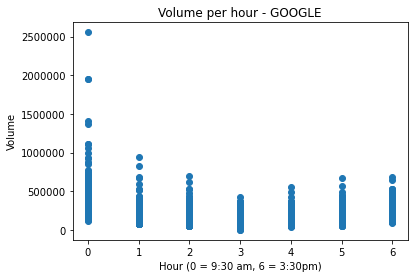

In [24]:
# Plotting the hour on the x-axis and the volume on the y-axis
plt.scatter(hourly_GOOGL['Hour'], hourly_GOOGL['Volume'])
plt.xlabel("Hour (0 = 9:30 am, 6 = 3:30pm)")
plt.ylabel("Volume")
plt.title("Volume per hour - GOOGLE")

# Just picking ticklabel formatting settings, other options include "scientific"
plt.ticklabel_format(style='plain')
plt.show()

As we can see, there are too many datapoints to identify important trends. However, we are able to see that there is less deviation in volume midday (3 = 12:30pm) indicating the least amount of volatility.

Now let's use our averaged values and plot them over time to see what other trends we can identify. This time, we'll use the seaborn library. We will be creating two figures with 3 plots each, one figure for GOOGL and one for ^GSPC.

##### Volume of Stocks

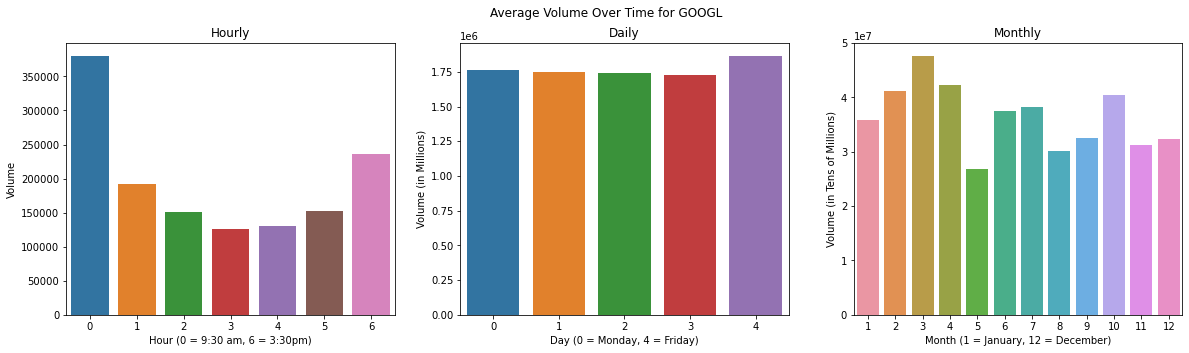

In [25]:
# Plotting GOOGL data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Average Volume Over Time for GOOGL")

# First subplot for hourly data
sns.barplot(ax=axes[0], x=avg_hourly_GOOGL["Hour"], y=avg_hourly_GOOGL["Volume"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)")

# Second subplot for daily data
sns.barplot(ax=axes[1], x=avg_daily_GOOGL["Weekday"], y=avg_daily_GOOGL["Volume"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Volume (in Millions)")

# Third subplot for monthly
sns.barplot(ax=axes[2], x=avg_monthly_GOOGL["Month"], y=avg_monthly_GOOGL["Volume"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Volume (in Tens of Millions)")

plt.show()

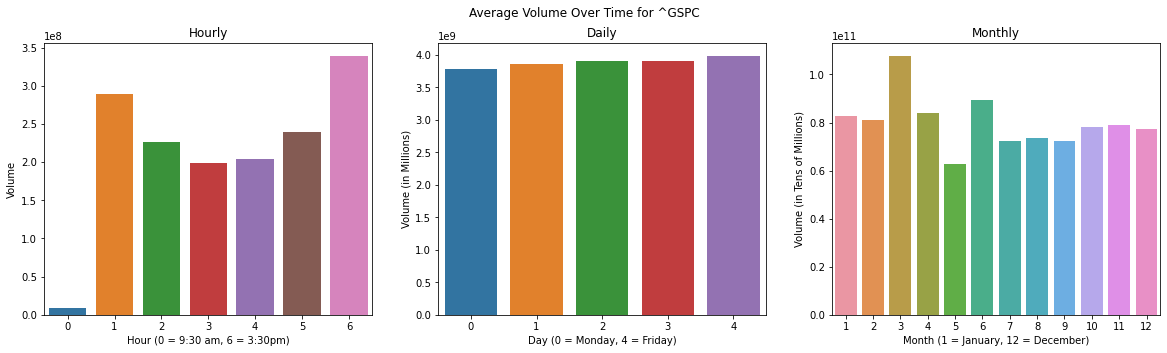

In [26]:
# Plotting ^GSPC data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Average Volume Over Time for ^GSPC")

# First subplot for hourly data
sns.barplot(ax=axes[0], x=avg_hourly_GSPC["Hour"], y=avg_hourly_GSPC["Volume"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)")

# Second subplot for daily data
sns.barplot(ax=axes[1], x=avg_daily_GSPC["Weekday"], y=avg_daily_GSPC["Volume"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Volume (in Millions)")

# Third subplot for monthly
sns.barplot(ax=axes[2], x=avg_monthly_GSPC["Month"], y=avg_monthly_GSPC["Volume"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Volume (in Tens of Millions)")

plt.show()

Awesome! These graphs allow us to see some trends in how the volume changes over time. This can help us understand time periods when stock is less or more volatile. Next let's see how percent change since open changes over time.

##### Percent Change Since Open

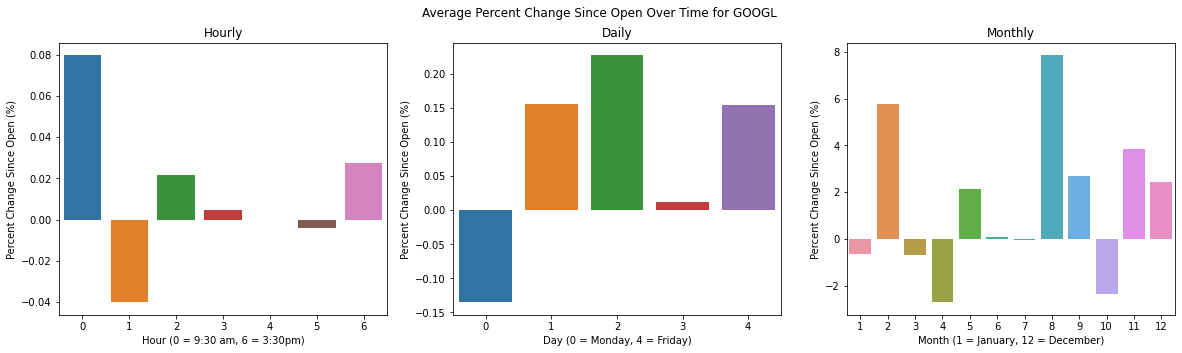

In [27]:
# Plotting GOOGL data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Average Percent Change Since Open Over Time for GOOGL")

# First subplot for hourly data
sns.barplot(ax=axes[0], x=avg_hourly_GOOGL["Hour"], y=avg_hourly_GOOGL["Pct_change_open"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)", ylabel= "Percent Change Since Open (%)")

# Second subplot for daily data
sns.barplot(ax=axes[1], x=avg_daily_GOOGL["Weekday"], y=avg_daily_GOOGL["Pct_change_open"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Percent Change Since Open (%)")

# Third subplot for monthly
sns.barplot(ax=axes[2], x=avg_monthly_GOOGL["Month"], y=avg_monthly_GOOGL["Pct_change_open"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Percent Change Since Open (%)")

plt.show()

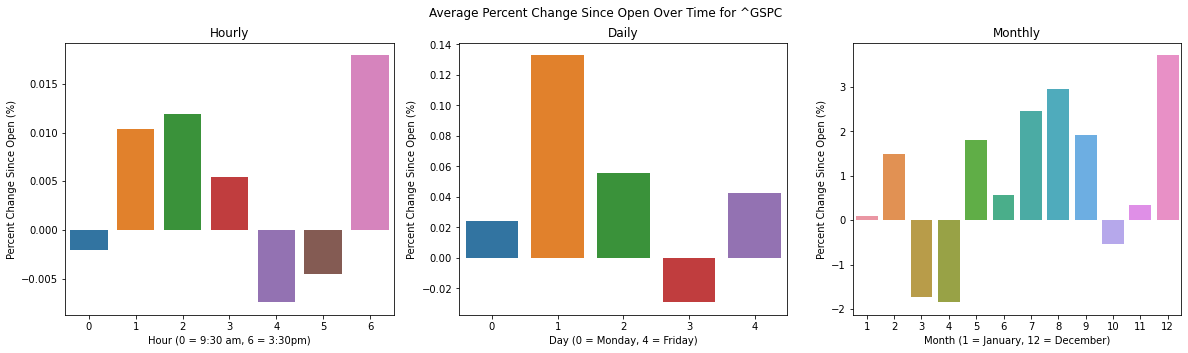

In [28]:
# Plotting ^GSPC data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Average Percent Change Since Open Over Time for ^GSPC")

# First subplot for hourly data
sns.barplot(ax=axes[0], x=avg_hourly_GSPC["Hour"], y=avg_hourly_GSPC["Pct_change_open"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)", ylabel= "Percent Change Since Open (%)")

# Second subplot for daily data
sns.barplot(ax=axes[1], x=avg_daily_GSPC["Weekday"], y=avg_daily_GSPC["Pct_change_open"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Percent Change Since Open (%)")

# Third subplot for monthly
sns.barplot(ax=axes[2], x=avg_monthly_GSPC["Month"], y=avg_monthly_GSPC["Pct_change_open"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Percent Change Since Open (%)")

plt.show()

We'll talk more about these graphs in the conclusion but off the bat we can notice some general trends with these graphs. For example, we see that for all time intervals, ^GSPC rises in price mid-day/mid-week/mid-year. So a good stratergy to follow might be to buy early in the morning and sell mid day, or for longer term holding stratergies, buy at the beginning of the week/year and sell mid-week/year. 

##### Closing Stock Price


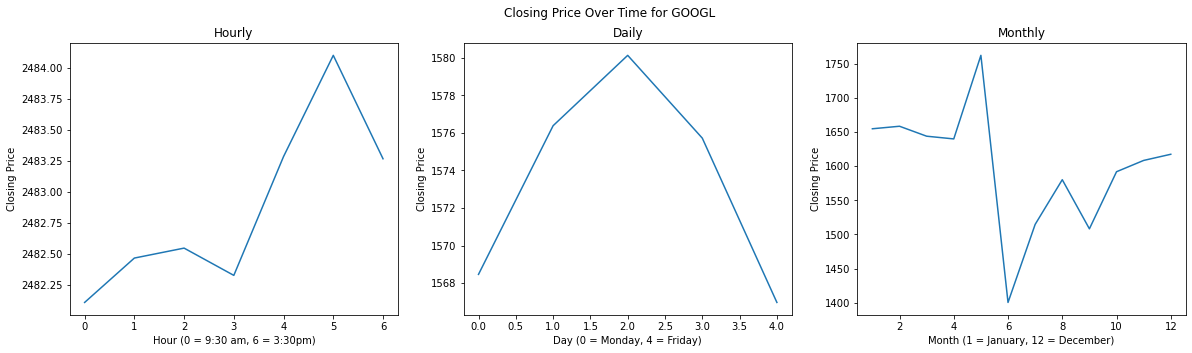

In [29]:
# Plotting GOOGL data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Closing Price Over Time for GOOGL")

# First subplot for hourly data
sns.lineplot(ax=axes[0], x=avg_hourly_GOOGL["Hour"], y=avg_hourly_GOOGL["Close"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)", ylabel= "Closing Price")

# Second subplot for daily data
sns.lineplot(ax=axes[1], x=avg_daily_GOOGL["Weekday"], y=avg_daily_GOOGL["Close"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Closing Price")

# Third subplot for monthly
sns.lineplot(ax=axes[2], x=avg_monthly_GOOGL["Month"], y=avg_monthly_GOOGL["Close"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Closing Price")

plt.show()

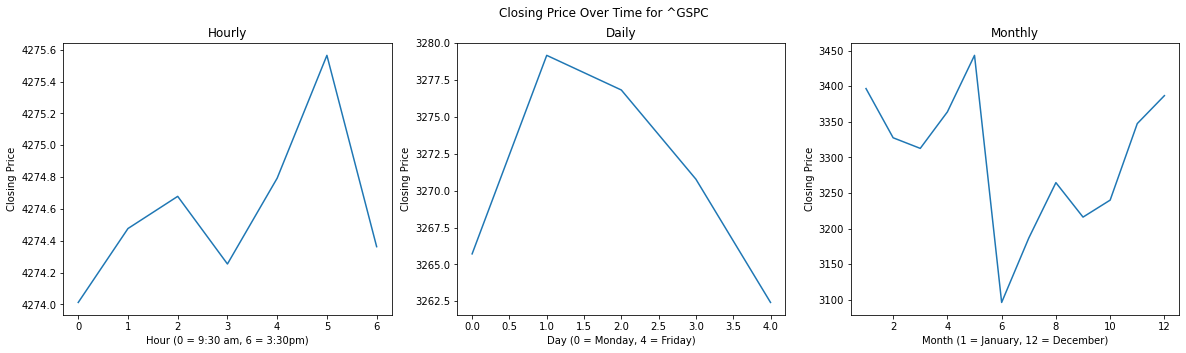

In [30]:
# Plotting ^GSPC data

# Creating the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Closing Price Over Time for ^GSPC")

# First subplot for hourly data
sns.lineplot(ax=axes[0], x=avg_hourly_GSPC["Hour"], y=avg_hourly_GSPC["Close"])
axes[0].set_title("Hourly")
axes[0].set(xlabel = "Hour (0 = 9:30 am, 6 = 3:30pm)", ylabel= "Closing Price")

# Second subplot for daily data
sns.lineplot(ax=axes[1], x=avg_daily_GSPC["Weekday"], y=avg_daily_GSPC["Close"])
axes[1].set_title("Daily")
axes[1].set(xlabel = "Day (0 = Monday, 4 = Friday)", ylabel="Closing Price")

# Third subplot for monthly
sns.lineplot(ax=axes[2], x=avg_monthly_GSPC["Month"], y=avg_monthly_GSPC["Close"])
axes[2].set_title("Monthly")
axes[2].set(xlabel = "Month (1 = January, 12 = December)", ylabel="Closing Price")

plt.show()

Now let's take a look at moving averages and what they show us. To calculate and plot moving averages, we will use the pandas_ta and plotly libraries. We will be calculating 5, 10, and 20 day moving averages and as such will use the daily data for both stocks. Additionally, we will also plot a smaller period of time so we can better visualize the moving day averages. 

In [31]:
# GOOGL

# Adding the moving average indicators, 5 day, 10 day, 20 day
moving_averages = ta.Strategy(
    name="moving indicators",
    ta=[
        {"kind": "sma", "length": 20},
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 5},
    ]
)

# Calculating the moving averages and adding them to the dataframe
daily_GOOGL.ta.strategy(moving_averages)


# Extracting around the last 6 months of data for GOOGL
# Note there are usually 253 trading days in a year, so 6 months of data is around 125 days
daily_GOOGL_SMA = daily_GOOGL.iloc[-125:]

#Creating a candlestick plot with green indicating increases in price and red indicating decreases in prices
fig = plotly.Figure(data=[
    plotly.Candlestick(
        x=daily_GOOGL_SMA["Date"],
        open=daily_GOOGL_SMA['Open'],
        high=daily_GOOGL_SMA['High'],
        low=daily_GOOGL_SMA['Low'],
        close=daily_GOOGL_SMA['Close'],
        increasing_line_color='#00cc00',
        decreasing_line_color='#ff0000',
        showlegend=False,
    ),
])

# Formatting Plot margin, font, and colors
layout = plotly.Layout(
    margin=dict(l=20, r=20, t=20, b=20),
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        ))
)

# In order to add the Moving Day Averages, we will add "traces" to the graph using the plotly api

# 20 day Moving Day Average (or SMA which stands for Simple Moving Average)
fig.add_trace(
    plotly.Scatter(
        x=daily_GOOGL_SMA["Date"],
        y=daily_GOOGL_SMA['SMA_20'],
        line=dict(color='#7138B6', width=2),
        name='SMA_20'
    )
)

# SMA 10
fig.add_trace(
    plotly.Scatter(
        x=daily_GOOGL_SMA["Date"],
        y=daily_GOOGL_SMA['SMA_10'],
        line=dict(color='#00C2E0', width=2),
        name='SMA_10'
    )
)

# SMA 5
fig.add_trace(
    plotly.Scatter(
        x=daily_GOOGL_SMA["Date"],
        y=daily_GOOGL_SMA['SMA_5'],
        line=dict(color='#5B2D00', width=2),
        name='SMA_5'
    )
)

fig.update_layout(layout)
fig.show()

In [32]:
# ^GSPC

# Adding the moving average indicators, 5 day, 10 day, 20 day
moving_averages = ta.Strategy(
    name="moving indicators",
    ta=[
        {"kind": "sma", "length": 20},
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 5},
    ]
)

# Calculating the moving averages and adding them to the dataframe
daily_GSPC.ta.strategy(moving_averages)


# Extracting around the last 6 months of data for GSPC
# Note there are usually 253 trading days in a year, so 6 months of data is around 125 days
daily_GSPC_SMA = daily_GSPC.iloc[-125:]

#Creating a candlestick plot with green indicating increases in price and red indicating decreases in prices
fig = plotly.Figure(data=[
    plotly.Candlestick(
        x=daily_GSPC_SMA["Date"],
        open=daily_GSPC_SMA['Open'],
        high=daily_GSPC_SMA['High'],
        low=daily_GSPC_SMA['Low'],
        close=daily_GSPC_SMA['Close'],
        increasing_line_color='#00cc00',
        decreasing_line_color='#ff0000',
        showlegend=False,
    ),
])

# Formatting Plot margin, font, and colors
layout = plotly.Layout(
    margin=dict(l=20, r=20, t=20, b=20),
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        ))
)

# In order to add the Moving Day Averages, we will add "traces" to the graph using the plotly api

# 20 day Moving Day Average (or SMA which stands for Simple Moving Average)
fig.add_trace(
    plotly.Scatter(
        x=daily_GSPC_SMA["Date"],
        y=daily_GSPC_SMA['SMA_20'],
        line=dict(color='#7138B6', width=2),
        name='SMA_20'
    )
)

# SMA 10
fig.add_trace(
    plotly.Scatter(
        x=daily_GSPC_SMA["Date"],
        y=daily_GSPC_SMA['SMA_10'],
        line=dict(color='#00C2E0', width=2),
        name='SMA_10'
    )
)

# SMA 5
fig.add_trace(
    plotly.Scatter(
        x=daily_GSPC_SMA["Date"],
        y=daily_GSPC_SMA['SMA_5'],
        line=dict(color='#5B2D00', width=2),
        name='SMA_5'
    )
)

fig.update_layout(layout)
fig.show()

Using 10 and 20 day SMA's we can employ a simple trading stratergy. Usually, when the SMA 10 (a trend of a shorter time period) crosses the SMA 20 (a trend of a longer time period) from below, it's called a cross-up. We can expect the stock to increase until the 10 SMA crosses back down the SMA 20. 

Longer-term investors also tend to use SMA 50 (50 day moving averages), SMA 100 (100 day moving averages), and SMA 200 (200 day moving averages). Then they use shorter trend indicators in comparison to longer term indicators to turn a profit. Be careful, however, as the SMA's don't always work in this way and news and volatility can cause stocks to perform in unexpected ways.

### 6. Analysis & Hypothesis Testing

After we have plotted our graphs and processed our data, we must conduct analysis to actually understand what all of this tells us. With analysis, we can further understand our data and get more information when making trades. Usually investors will use a lot of indicators such as change in volume, moving day averages, and daily/weekly trends (such as the mid day rally with GOOGL stock) to make decisions. 

We will use Linear Regression, k-NN (k-Nearest Neighbours), and LTSM to look at our data and predict trends and test some hypothesis's. 

Linear Regression is a model that determines relationships between the independent variables and dependent variables. In our case, we do not have a set of independent variables but we do have the dates. So we will use the fats to extract features such as day, month, year, etc. and then fit a linear regression model.

We will fit this model on the daily stock data for ^GSPC. First, we will reindex our dataframe by date and sort it in ascending order. Then we will copy over the dataframe so adding features does not modify our dataset. Then we will create our features using the date. Apart from this, based on the closing price graphs, I can make a hypothesis that the first and last day of the week affect the closing stock price more than the other days. Using this hypothesis we can create another feature where we identify whether a day is Tuesday/Wednesday/Thursday (by a value of 0) or Monday/Friday (by a value of 1). If you think there are other features that may be helpful in predicting the price, feel free to add them in your own analysis!

In [33]:
# Formatting the date and the indexing by Date
daily_GSPC["Date"] = pd.to_datetime(daily_GSPC["Date"], format='%Y-%m-%d')
daily_GSPC.index = daily_GSPC["Date"]

# Sorting by index
daily_GSPC = daily_GSPC.sort_index(ascending=True, axis=0)

# Copying over the dataframe with the columns that we want
daily_GPSC_LR = pd.DataFrame(index=range(0, len(daily_GSPC)),columns=["Date", "Close"])
for i in range(0, len(daily_GOOGL)):
  daily_GPSC_LR.iloc[i]["Date"] = daily_GSPC.iloc[i]["Date"]
  daily_GPSC_LR.iloc[i]["Close"] = daily_GSPC.iloc[i]["Close"]

# Creating features from date such as "Year", "Month", "Week", "Is_month_start", "Is_quarter_end", "Is_year_end", 
# "Is_year_start", etc.
add_datepart(daily_GPSC_LR, 'Date')
# Elapsed is just the time stamp so we can drop it
daily_GPSC_LR.drop("Elapsed", axis=1, inplace=True)
# Adding my own feature
daily_GPSC_LR["Mid-Week"] = 0
for i in range(0, len(daily_GPSC_LR)):
  if(daily_GPSC_LR.loc[i, "Dayofweek"] == 0 or daily_GPSC_LR.loc[i, "Dayofweek"] == 4):
    daily_GPSC_LR.loc[i, "Mid-Week"] = 1
  else: 
    daily_GPSC_LR.loc[i, "Mid-Week"] = 0
  
print(len(daily_GPSC_LR))
daily_GPSC_LR.head(5)

1260


,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Mid-Week
0,2402.320068,2017,5,20,15,0,135,False,False,False,False,False,False,1
1,2400.669922,2017,5,20,16,1,136,False,False,False,False,False,False,0
2,2357.030029,2017,5,20,17,2,137,False,False,False,False,False,False,0
3,2365.719971,2017,5,20,18,3,138,False,False,False,False,False,False,0
4,2381.72998,2017,5,20,19,4,139,False,False,False,False,False,False,1


Above we can see what our features look like. Next, we will split the data into training and validation sets to check the performance of the model. We see that there are 1259 rows. We will split it so there are 990 rows in the training set and 269 rows in the validation set.

In [34]:
# Creating training and validation sets
training = daily_GPSC_LR[:990]
validation = daily_GPSC_LR[990:]

# Creating the x and y values for the training and validation sets
x_training = training.drop("Close", axis=1)
y_training = training["Close"]
x_validation = validation.drop("Close", axis=1)
y_validation = validation["Close"]

# Implementing linear regression
model = LinearRegression()
model.fit(x_training, y_training)

# Predicting values using the model
predictions = model.predict(x_validation)
# Calculating root mean squared error
rms = np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)), 2)))
rms

721.3906646165877

Our RMS value is very high which indicates that our linear regression model has performed poorly in predicitng stock prices. We will plot out model's predictions to better understand what happened. 

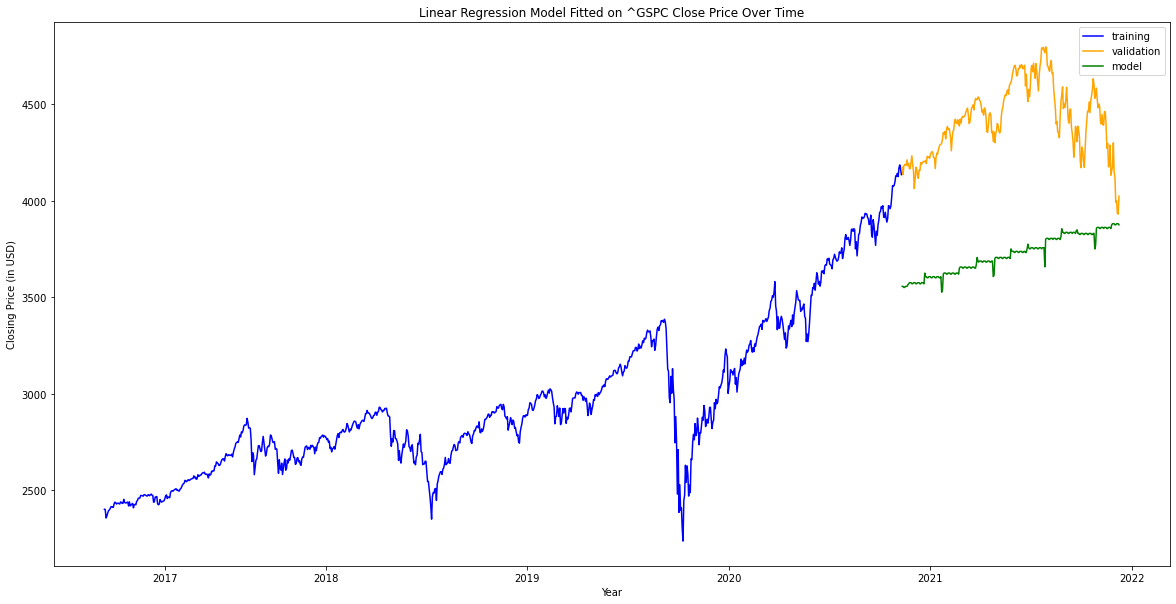

In [35]:
# Adding the predictions to the validation dataframe
validation.insert(0, "Predictions", predictions)

# Plotting our training set closing price and then the rest of the dataset's closing price with the prediction
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(training["Close"], color = "blue", label="training")
ax.plot(validation["Close"], color = "orange", label="validation")
ax.plot(validation["Predictions"], color = "green", label="model")
plt.legend()
plt.title("Linear Regression Model Fitted on ^GSPC Close Price Over Time")
# Indexing the x-axis to the timeline we are plotting data across
plt.xticks([75, 275, 525, 775, 1025, 1275], labels=["2017", "2018", "2019", "2020", "2021", "2022"])
plt.xlabel("Year")
plt.ylabel("Closing Price (in USD)")
plt.show()

It looks like our linear regression model overfits to the date and month column. Our regression model is more closely following our training set and fails to accurately predict the validation data. 

Noe let's use k-NN, another Machine Learning algorithm. Based on the independent variables, kNN finds the similarity between new data points and old data points based on the neighboring data points. 

In [36]:
# Defining scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# We will use the same training and validation sets from the last section
# scaling the data according to the feature_range defined above
x_training_scaled = scaler.fit_transform(x_training)
x_training = pd.DataFrame(x_training_scaled)
x_validation_scaled = scaler.fit_transform(x_validation)
x_validation = pd.DataFrame(x_validation_scaled)

# Using gridsearch to ding the best parameter
parameters = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, parameters, cv=5)

# Fit the model and make predictions
model.fit(x_training, y_training)
predictions = model.predict(x_validation)

# Calculating Root Mean Square Error
rms=np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)),2)))
rms


1574.6408176148404

The RMS value here is even larger than before meaning the k-NN algorithm performed even worse than the linear regression. Let's plot our predictions to see what they look like. 

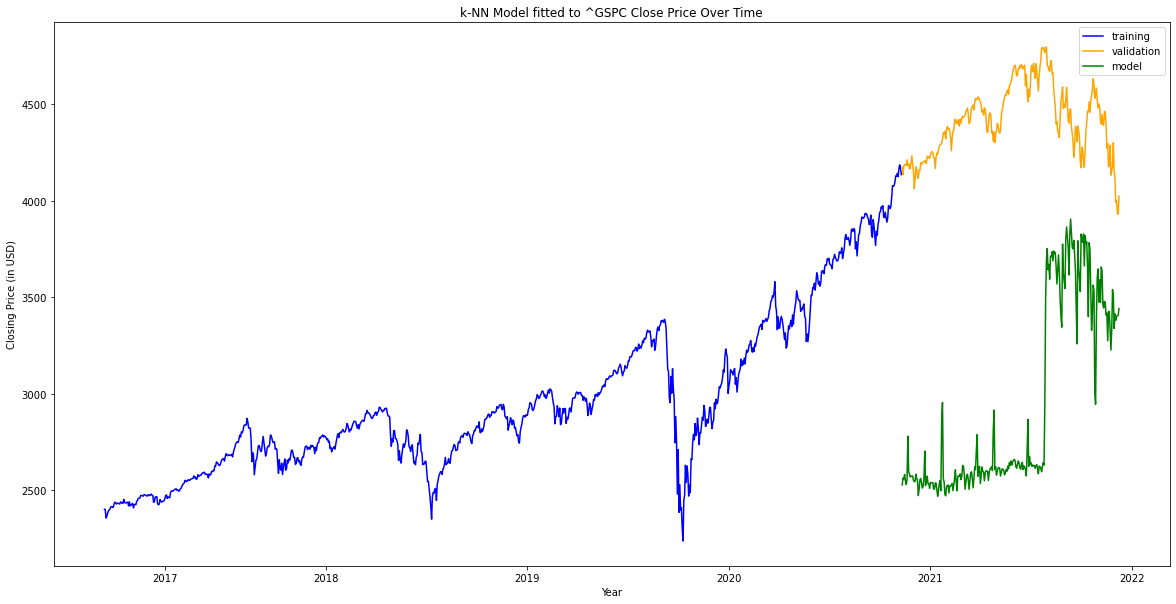

In [37]:
# Replacing predictions with the new ones we created
validation = validation.drop(["Predictions"], axis=1)
validation.insert(0, "Predictions", predictions)
# Plotting our training set closing price and then the rest of the dataset's closing price with the prediction
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(training["Close"], color = "blue", label="training")
ax.plot(validation["Close"], color = "orange", label="validation")
ax.plot(validation["Predictions"], color = "green", label="model")
plt.legend()
plt.title("k-NN Model fitted to ^GSPC Close Price Over Time")
# Indexing the x-axis to the timeline we are plotting data across
plt.xticks([75, 275, 525, 775, 1025, 1275], labels=["2017", "2018", "2019", "2020", "2021", "2022"])
plt.xlabel("Year")
plt.ylabel("Closing Price (in USD)")
plt.show()

Off the bat, we can see the prediction by the model is very far away in terms of price of stock. This explains the larger RMS score. The predictions look almost similar to the linear regression model except halfway through it mimics the curve of the validation set. After using both these models, we can say that regression models have not worked well for our purposes. 

Lastly, let's use LTSM (Long Short Term Memory). LSTM is used a lot for problems involving sequence prediction problems. LSTM will have three gates: 
- The input gate: Adds information
- The forget gate: removes information no longer required by the model
- The output gate: selects the information to be shown as output
For now, let's think about it like a black box that takes in data and outputs predictions. Additionally, we will be using standard settings for the LSTM model. If you'd like to learn more about hyperparameter tuning (changing the number of layers, adding drouput value or increasing the number of epochs), [click here](https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/)

In [38]:
# Sorting data and then copying it over
data = daily_GSPC.sort_index(ascending=True, axis = 0)
daily_GPSC_LTSM = pd.DataFrame(index=range(0, len(daily_GSPC)), columns=["Date", "Close"])
for i in range(0, len(data)):
  daily_GPSC_LTSM.iloc[i]["Date"] = data.iloc[i]["Date"]
  daily_GPSC_LTSM.iloc[i]["Close"] = data.iloc[i]["Close"]
  
# Resetting the index
daily_GPSC_LTSM.index = daily_GPSC_LTSM["Date"]
# Dropping date column as we have indexed with Date already
daily_GPSC_LTSM.drop('Date', axis=1, inplace=True)

# Creating out training and validationn sets
dataset_LTSM = daily_GPSC_LTSM.values
training = dataset_LTSM[0:990,:]
validation = dataset_LTSM[990:,:]

# Converting our dataset into x_training and y_training values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_LTSM)

# Note the shape of x_train will be (930, 60) and y_train will be (930, 1)
x_train, y_train = [], []
for i in range(60,len(training)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping x_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# Predicting 269 values using the past 60 from the training dataset
inputs = daily_GPSC_LTSM[len(daily_GPSC_LTSM) - len(validation) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

# Creating a X_test dataset to use for the model to predict
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Predicting Values 
closing_price = model.predict(X_test)
# Converting our values back to their original form using inverse_transform
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((validation-closing_price),2)))
rms

2022-05-13 17:46:02.722076: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


930/930 - 14s - loss: 0.0020 - 14s/epoch - 15ms/step


111.5107937672868

We can notice that our RMS is significantly lower than before indicating that this model has performed relatively well in predicting stock data. Let's plot this to get a better sense. 

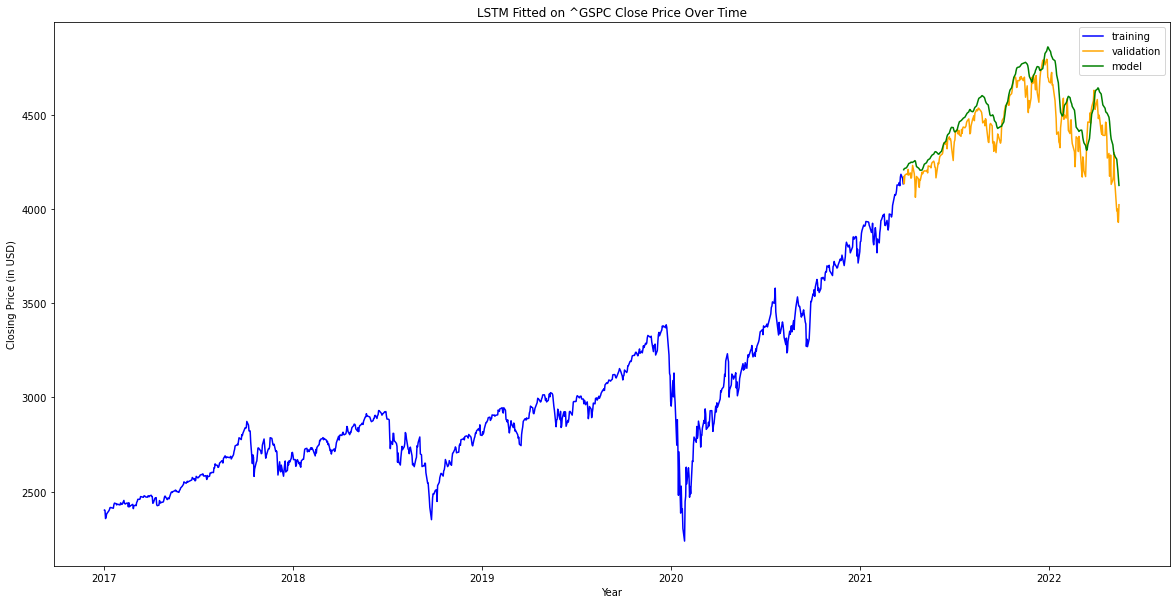

In [39]:
# Defining our training and validation sets
training = daily_GPSC_LTSM[:990]
validation = daily_GPSC_LTSM[990:]

# Adding the predictions to the validation dataframe
validation.insert(0, "Predictions", closing_price)

# Plotting our training set closing price and then the rest of the dataset's closing price with the prediction
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(training["Close"], color = "blue", label="training")
ax.plot(validation["Close"], color = "orange", label="validation")
ax.plot(validation["Predictions"], color = "green", label="model")
plt.legend()
plt.title("LSTM Fitted on ^GSPC Close Price Over Time")
# Indexing the x-axis to the time we are plotting data across
plt.xticks([17300, 17640, 17980, 18320, 18660, 19000], labels=["2017", "2018", "2019", "2020", "2021", "2022"])
plt.xlabel("Year")
plt.ylabel("Closing Price (in USD)")
plt.show()

Wow! the LTSM was highly accurate in predicting the movement of our stock data. But there are a lot of implications we must consider before we can start to utilize any of this data. We will talk more about this in the next section

### 7. Conclusions & Insights
Throughout this tutorial, we walked through:
- Understanding the motivation behind data analysis in the stock market
- Collecting, Processing, Visualizing, and Analyzing Data
- Testing Hypothesis
- Using different models to predict stock prices

After going through this tutorial, you have hopefully gained a better sense of what the data science pipeline is and the importance of data analysis. Starting with our exploratory analysis with graphs, we were able to identify that the market is least volatile mid-day for both GOOGL and ^GSPC on average (indicative by volume of stock). 

From the daily percent change since open graphs for both GOOGL and ^GSPC, we are able to see that stock prices are highest mid-week. this is further corroborated by the graphs for closing price over time for both stocks. Closing price over time on the hourly interval shows us another interesting trend. Both GOOGL and ^GSPC tend to increase in price towards the end of the day. This might indicate that a good short term stratergy is to buy GOOGL and ^GSPC in the morning and sell by the end of the day. On the longer term, we could also buy and hold till mid-week when prices tend to be higher. 

We were also able to identify how moving day averages are helpful in predicting trends in stocks. For example, a cross up (a SMA 10 crossing a SMA 20 from below predicting an increase in price). 

Lastly, we were also able to fit different models such as Linear Regression, k-NN, and LSTM to predict our stock prices. In general, with all three models we are able to see that there is a relationship between time and stock price (in the increasing trend). Using Root Mean Square error, we were able to assess our models and benchmark their performance against each other. However, it is important to note that stock prices are also affected by certain intangible favtors which are impossible to predict beforehand like news about the company or other factors like demonitization or merger/demereger of companies.

Usually investors will use a combination of these metrics to help them make decisions in the market. 

Now that you have gone through this tutorial, I would encourage you to open your own Jupyter Notebook and get started with your own stock market analysis! Try to think of creative features that could help you better predict stock prices and give you an edge in the market. However, remember, at the end of the day all of this analysis is only helpful to a certain extent. Being able to make decisions solely based on data takes a lot more data points such as sentiment analysis, company's financial health, etc. 

Disclaimer: This notebook is solely for educational purposes. I am not a financial advisor and nothing in this document is intended as financial advice. You should always conduct your own research and analysis before making decisions in the stock market for the best chance for profit. 

"An investment in knowledge pays the best interest." — Benjamin Franklin